In [3]:
library('igraph')
library('Matrix')
library('pracma')

In [18]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

### Part 2. Random Walk on Networks

#### 1. Random walk on Erdös-Rényi networks

**a. Create an undirected random network with 1000 nodes and p = 0.01**

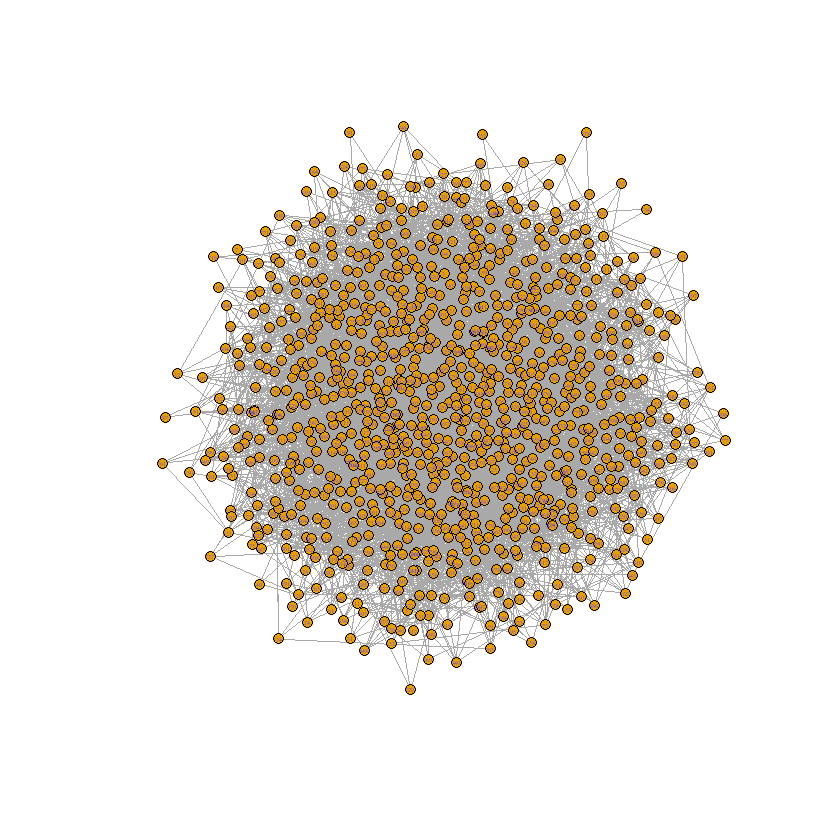

In [21]:
set.seed(1)
g <- erdos.renyi.game(1000, p = 0.01, directed=F)
plot(g1,vertex.size=4, vertex.label.cex=0.3)

**b. **

In [20]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [38]:
RowVar <- function(x) {
  rowSums((x - rowMeans(x))^2)/(dim(x)[2] - 1)
}

In [48]:
set.seed(1)
tm <- create_transition_matrix(g)
g_vcount = vcount(g)

s_t_matrix <- c()
last_deg <- c()
for (init_node in sample(1:g_vcount, 300)){
    trial_s = c()
    last = init_node
    for (t in 1:300){
        PMF = tm[last, ]
        last = sample(1:g_vcount, 1, prob = PMF)  
        shortestpath = shortest.paths(g, init_node, last)
        trial_s = c(trial_s, shortestpath)
    }
    last_deg <- c(last_deg, degree(g, last))
    s_t_matrix <- cbind(s_t_matrix, trial_s)
}
s_t <- rowMeans(s_t_matrix)
var_t <- RowVar(s_t_matrix)

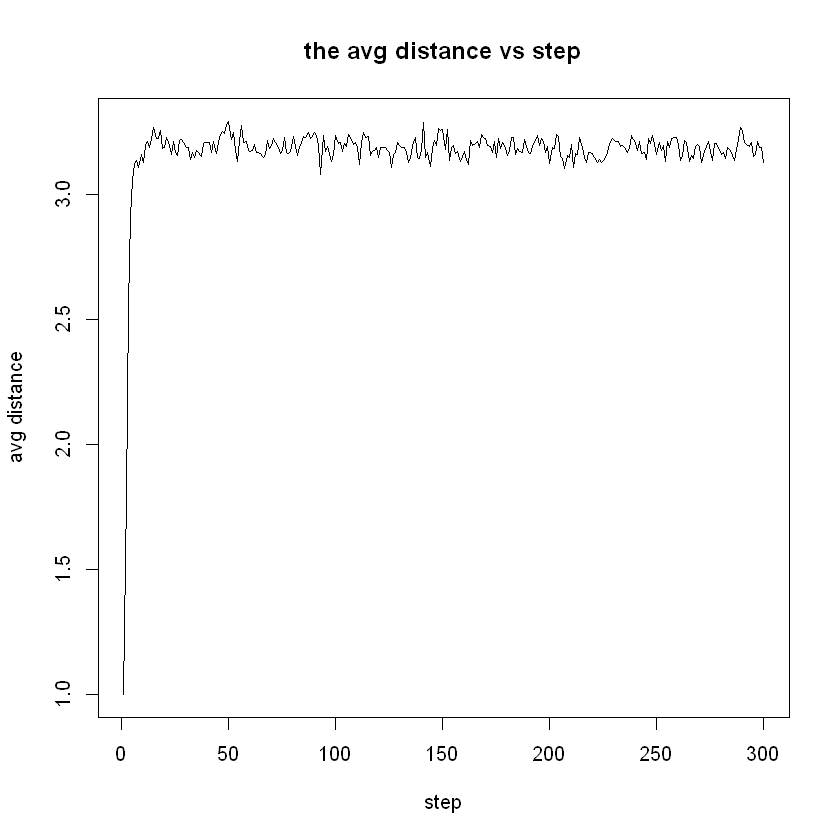

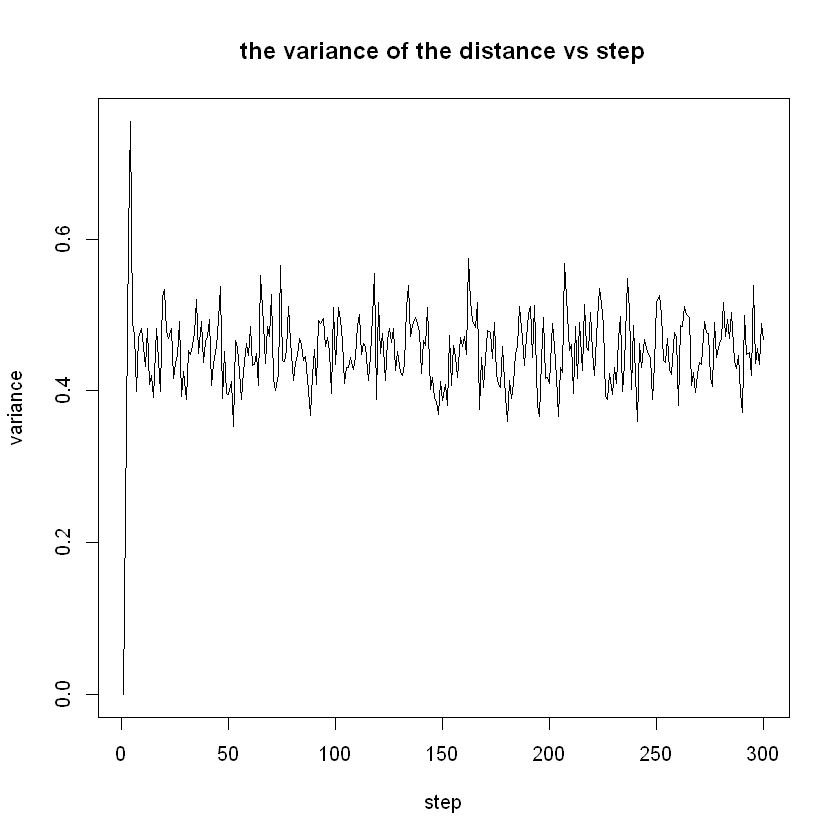

In [49]:
plot(s_t, main="the avg distance vs step",xlab="step",ylab="avg distance",type="l")
plot(var_t, main="the variance of the distance vs step",xlab="step",ylab="variance",type="l")

**c.**

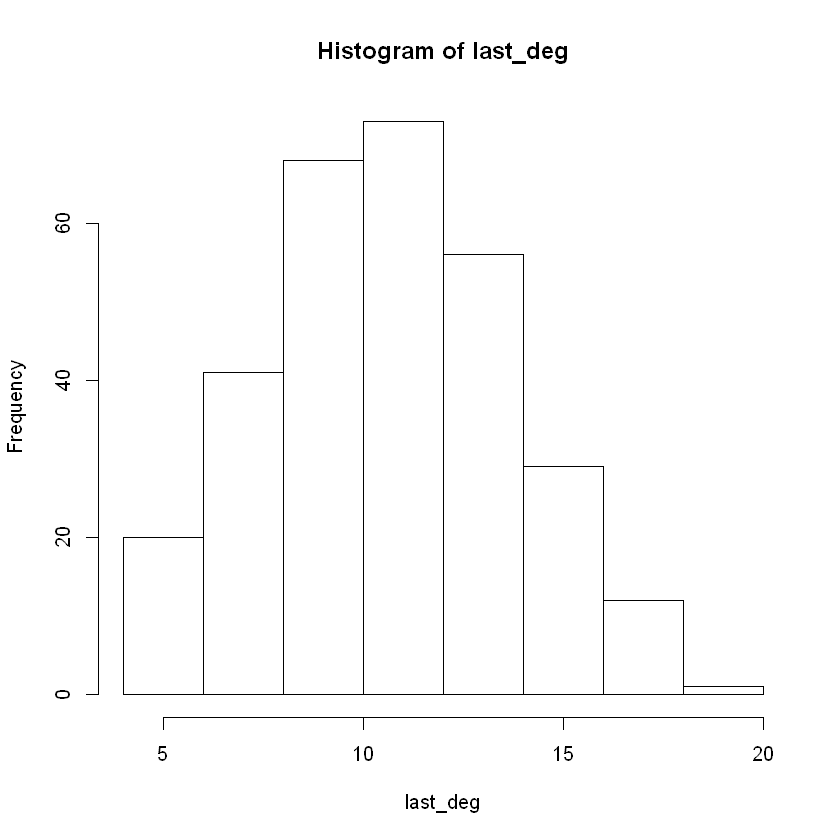

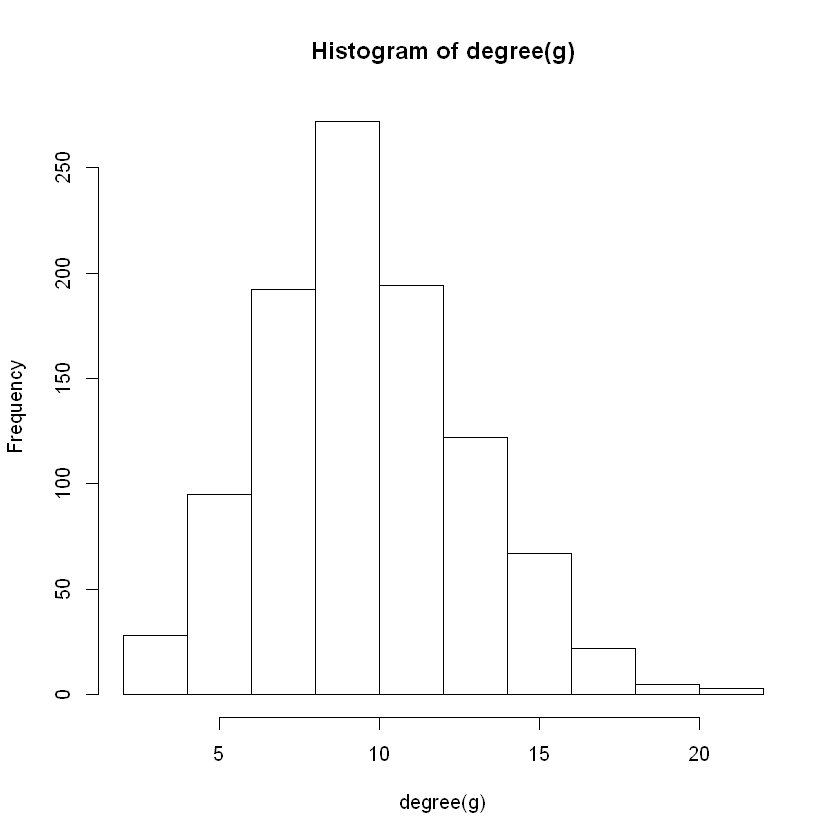

In [50]:
hist(last_deg)
hist(degree(g))

**d.**